# 3. Consuming data using Kafka
In this task, we will implement an Apache Kafka consumer to consume the data from task 2.8b.

Important: 
- In this task, use Kafka consumer to consume the streaming data published from task 2.8b.
- Do not use Spark in this task

Draw a line chart using the data you received. Use timestamp(the key of the data you received) as the x axis, and the avg weekly salsed of each type store as y axis. The plot should be update after each time you received new batch of data.

<IPython.core.display.Javascript object>


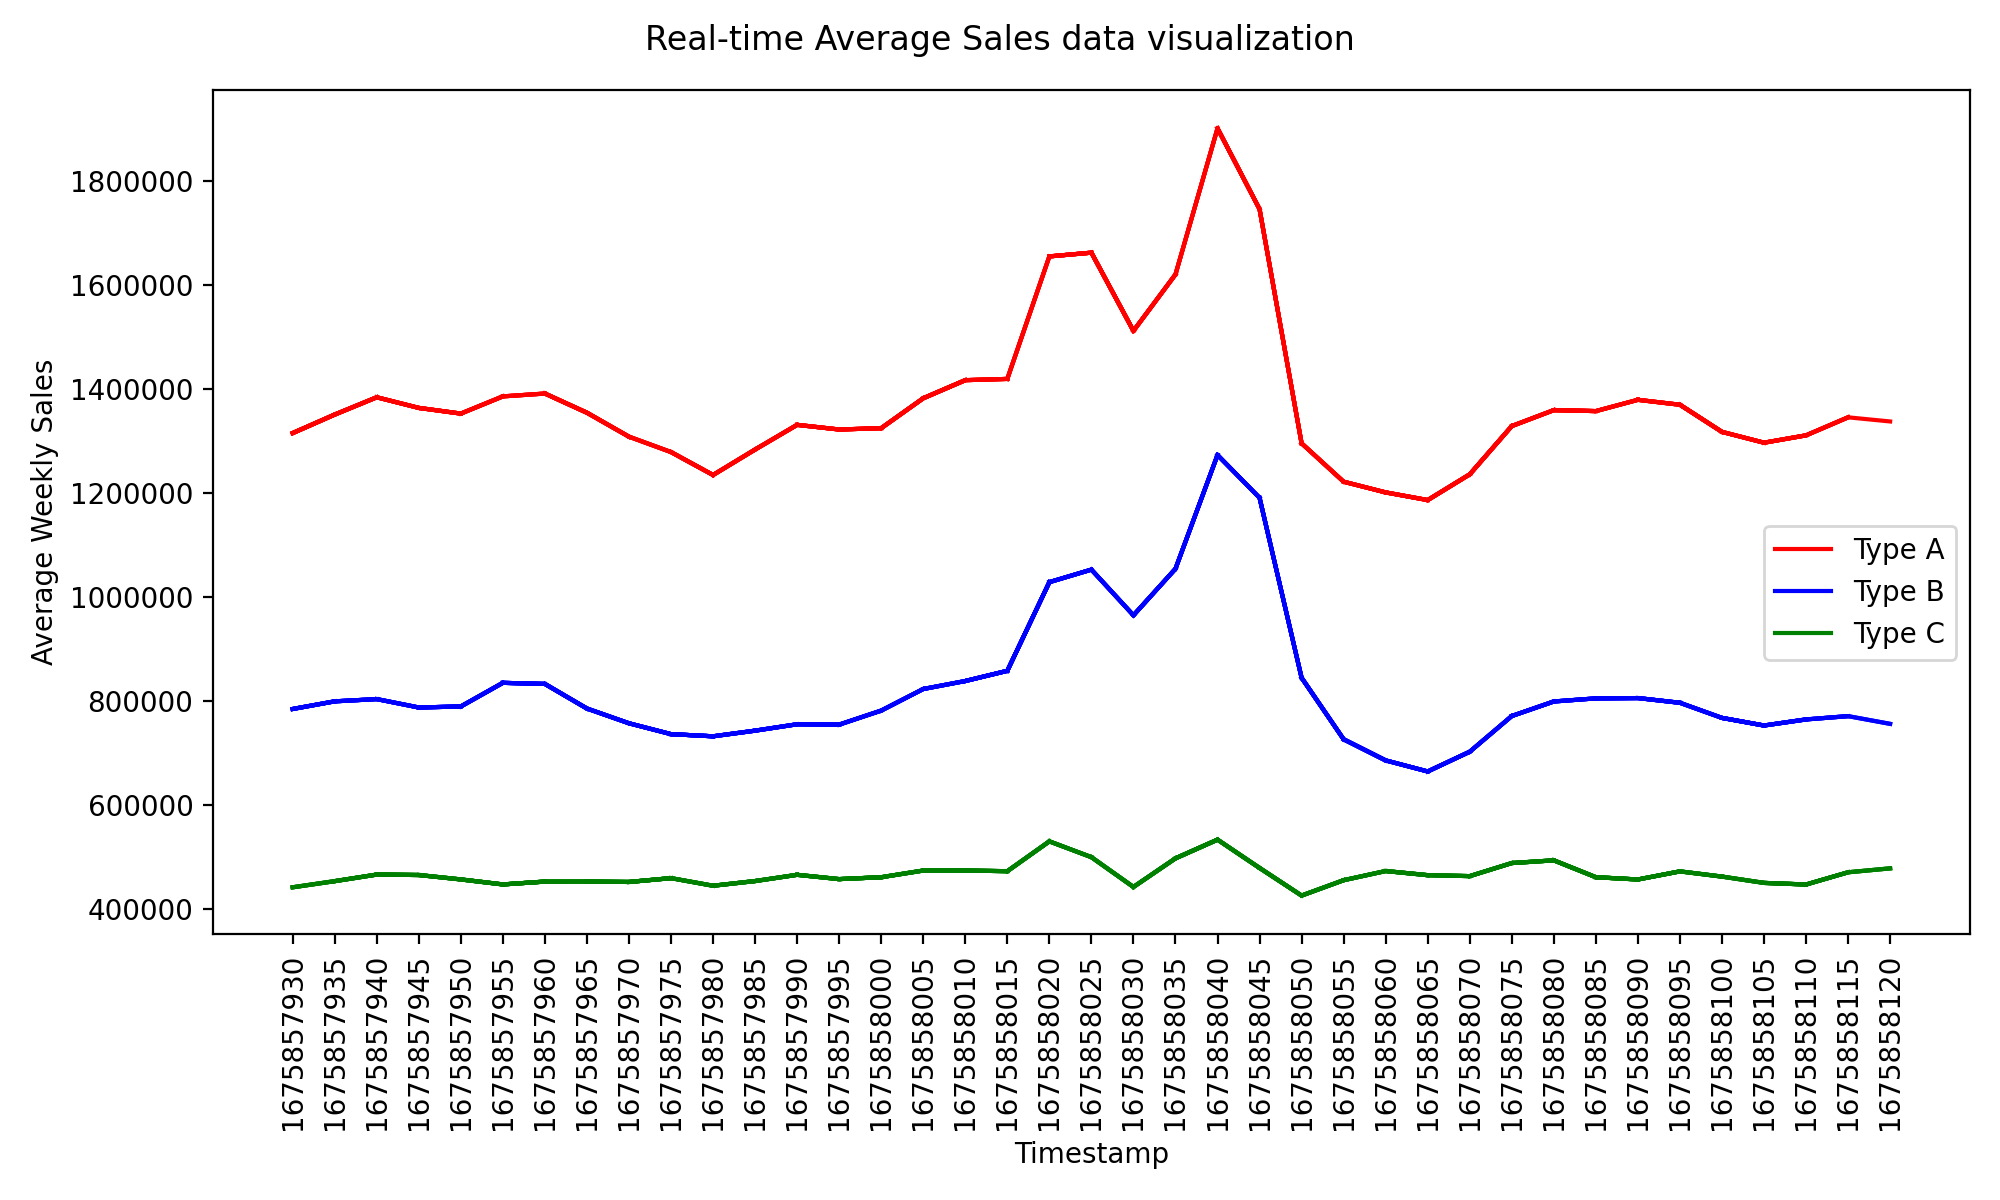

KeyboardInterrupt: 

In [2]:
#importing the libraries and statements
import json
import matplotlib
import matplotlib.pyplot as plt
from kafka3 import KafkaConsumer

#this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook


def connect_kafka_consumer():
    
    #configuration
    hostip = "192.168.62.158" #change me
    consumer = KafkaConsumer("pyspark_stream",
                            bootstrap_servers = [f'{hostip}:9092'],
                            auto_offset_reset = 'latest', #consuming latest message available
                            consumer_timeout_ms = 100000, # stop iteration if no message after 10 sec
                            key_deserializer = lambda x: x.decode('utf-8'), #decoding the keys according to utf-8 standard
                            value_deserializer = lambda x: json.loads(x.decode('utf-8')), #decoding the values according to utf-8 standard
                            api_version = (0, 10))
    return consumer


def consume_messages(consumer):
    
    #creating new figure
    fig = plt.figure(figsize=(10, 6))
    
    #giving the figure a title
    fig.suptitle('Real-time Average Sales data visualization') 
    
    #containers for x and y values for A, B, C stores
    #x1, y1 for type A
    #x2, y2 for type B
    #x3, y3 for type C
    x1, y1, x2, y2, x3, y3 = [], [], [], [], [], []
    
    for message in consumer:
        
        #appending the values of A to x1, y1
        if(message.value["Type"] == "A"):
            x1.append(message.key)
            y1.append(message.value["predict_weekly_sales"])
            #removing the item in the first position when the number of points exceeds 3
            if((len(x1) > 3) and (len(y1) > 3)):
                x1.pop(0)
                y1.pop(0)
        
        #appending the values of B to x2, y2
        if(message.value["Type"] == "B"):
            x2.append(message.key)
            y2.append(message.value["predict_weekly_sales"])
            #removing the item in the first position when the number of points exceeds 3
            if((len(x2) > 3) and (len(y2) > 3)):
                x2.pop(0)
                y2.pop(0)
        
        #appending the values of C to x3, y3
        if(message.value["Type"] == "C"):
            x3.append(message.key)
            y3.append(message.value["predict_weekly_sales"])
            #removing the item in the first position when the number of points exceeds 3
            if((len(x3) > 3) and (len(y3) > 3)):
                x3.pop(0)
                y3.pop(0)
        
        #plot line graph for A, B, C stores type
        plt.plot(x1, y1, color='r', label = "Type A")
        plt.plot(x2, y2, color='b', label = "Type B")
        plt.plot(x3, y3, color='g', label = "Type C")
        
        #giving labels for X and Y axes
        plt.xlabel('Timestamp')
        plt.ylabel('Average Weekly Sales')
        plt.ticklabel_format(style = 'plain', axis = 'y')
        plt.xticks(rotation = 90)
        plt.legend(["Type A", "Type B", "Type C"], bbox_to_anchor=(1, 0.5))
        fig.canvas.draw() #drawing on the canvas
        plt.tight_layout()
    plt.close('all')

if __name__ == '__main__':
    consumer = connect_kafka_consumer()
    consume_messages(consumer)
    
###  PLEASE WAIT FOR A FEW SECONDS FOR THE OUTPUT PLOT TO BE DISPLAYED  ####

## References:

- Tutorial - 9

- afsarafsar                    6911 silver badge99 bronze badges (1964) How to convert spark streaming nested JSON coming on Kafka to flat dataframe?, Stack Overflow. Available at: https://stackoverflow.com/questions/46204750/how-to-convert-spark-streaming-nested-json-coming-on-kafka-to-flat-dataframe (Accessed: February 8, 2023). 

- Kukreja, M. (2020) Track real-time gold prices using Apache Kafka, Pandas &amp; matplotlib, Medium. Towards Data Science. Available at: https://towardsdatascience.com/track-real-time-gold-prices-using-apache-kafka-pandas-matplotlib-122a73728a88 (Accessed: February 8, 2023). 

- Structured Streaming + kafka integration guide (kafka broker version 0.10.0 or higher) (no date) Structured Streaming + Kafka Integration Guide (Kafka broker version 0.10.0 or higher) - Spark 3.3.1 Documentation. Available at: https://spark.apache.org/docs/latest/structured-streaming-kafka-integration.html (Accessed: February 8, 2023). 

- Structured Streaming Programming Guide (no date) Structured Streaming Programming Guide - Spark 3.3.1 Documentation. Available at: https://spark.apache.org/docs/latest/structured-streaming-programming-guide.html (Accessed: February 8, 2023). 